In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("stack_overflow_questions_data.csv")

In [4]:
df.head()

,Question,Votes,Answers,Views,Tags,Date
0,"Concatenate year, month, day and time problem ...",0,3,20,"['r', 'dataframe', 'datetime', 'dplyr']",15 secs ago
1,Why is spring boot returning empty for current...,0,1,16,"['java', 'spring', 'spring-boot', 'spring-secu...",49 secs ago
2,What is the idiomatic Go equivalent of C's ter...,513,14,375k,"['go', 'ternary-operator', 'conditional-operat...",50 secs ago
3,How to properly test a AWS Backup plan,0,0,2,"['amazon-web-services', 'aws-backup']",53 secs ago
4,Cannot install Openvino with pip,5,4,6k,"['python', 'pip', 'openvino']",53 secs ago


In [5]:
#considering dataset from here
nov = 44489
new_df = df.iloc[nov:].copy()
new_df.reset_index(drop=True,inplace=True)

In [6]:
tags_list = []
def extract_tags(value):
    helper =[]
    helper = value.split(",")

    helper2 =[]
    for value in helper:
        helper2.append(value.strip("'[ ']'"))
    tags_list.append(helper2)

new_df['Tags'].apply(extract_tags)

0         None
1         None
2         None
3         None
4         None
          ... 
605286    None
605287    None
605288    None
605289    None
605290    None
Name: Tags, Length: 605291, dtype: object

In [7]:
tags_df = pd.DataFrame(data=tags_list,columns=['tag1','tag2','tag3','tag4','tag5'])

In [8]:
tags_df.drop(columns = ['tag3','tag4','tag5'], axis=1,inplace=True)

In [9]:
#creating key-value for tags
np.random.seed(42)
tags_key = {}
values = [np.random.randint(1,30000) for i in range(25603)]
for index,value in enumerate(tags_df['tag1'].unique()):
    tags_key.update({value:values[index]})
for value in tags_df['tag2'].unique():
    tags_key.update({value:values[index]})
    index=index+1

In [10]:
new_df['tag1'] = tags_df['tag1']
new_df['tag2'] = tags_df['tag2']

In [11]:
def to_thousands(value):
    if value[-1] == 'k':
        val = int(value[:-1])*1000
        return (val)
    else:
        return int(value)

new_df['Views'] = new_df['Views'].apply(to_thousands)

In [12]:
#creating target variable
def to_target(value):
    if value >=1:
        return 1
    else:
        return 0
new_df['answered'] = new_df['Answers'].apply(to_target)

In [13]:
new_df.drop(columns=['Answers','Question','Date'],axis=1,inplace=True)

In [14]:
new_df

,Votes,Views,Tags,tag1,tag2,answered
0,2,31,"['ios', 'swift', 'react-native', 'healthkit']",ios,swift,1
1,1,7,"['python', 'django', 'select', 'relationship',...",python,django,0
2,0,19,"['youtube', 'youtube-api', 'vimeo', 'plyr.js']",youtube,youtube-api,0
3,1,46,"['range', 'submit', 'abap', 'alv', 'sap-select...",range,submit,1
4,0,23,"['python', 'count', 'modulo']",python,count,1
...,...,...,...,...,...,...
605286,1,255,"['android', 'android-13', 'android-device-sett...",android,android-13,1
605287,0,127,"['azure', 'api', 'azure-managed-grafana']",azure,api,1
605288,1,32,['hasura'],hasura,None,0
605289,0,68,"['excel', 'powerquery']",excel,powerquery,1


In [15]:
def assign_value(value,key):
    assigned_value = key.get(value)
    return assigned_value

new_df['tag1_feature'] = new_df['tag1'].apply(assign_value,key=tags_key)
new_df['tag2_feature'] = new_df['tag2'].apply(assign_value,key=tags_key)

In [16]:
new_df.drop(columns=['Tags','tag1','tag2'],axis=1,inplace=True)

In [17]:
new_df.rename(columns={'Votes':'votes','Views':'views'},inplace=True)

In [18]:
X = new_df.loc[:, ('votes','views','tag1_feature','tag2_feature')]
y = new_df.loc[:, ('answered')]

In [19]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [20]:
print(len(X_train), len(X_test), len(X_val))

423703 90794 90794


In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [22]:
import warnings
warnings.filterwarnings(action='ignore')
log_reg.predict([[1,27,19774,26338]])

array([1], dtype=int64)

In [23]:
y_pred = log_reg.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.691984051809591

##### trying out with different clasifiers
##### 1. Random Forest 2. ADA boost (as the dataset is large, svm is not trained.)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest_clf = RandomForestClassifier(n_estimators=200,min_samples_split=1000)

In [33]:
rnd_forest_clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=1000, n_estimators=200)

In [34]:
y_pred = rnd_forest_clf.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.7762737625834306

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

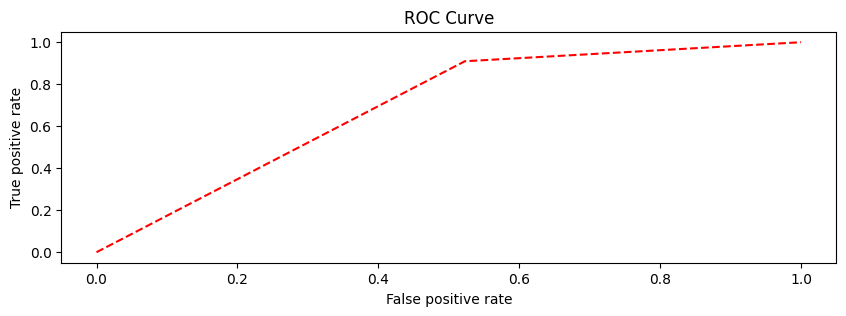

In [49]:
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,"r--")
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
y_predr = tree_clf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.774687754697447

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(estimator=tree_clf,n_estimators=200,random_state=42)

In [57]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                   random_state=42)

In [66]:
y_preda = ada_clf.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.7824085291979647

In [60]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

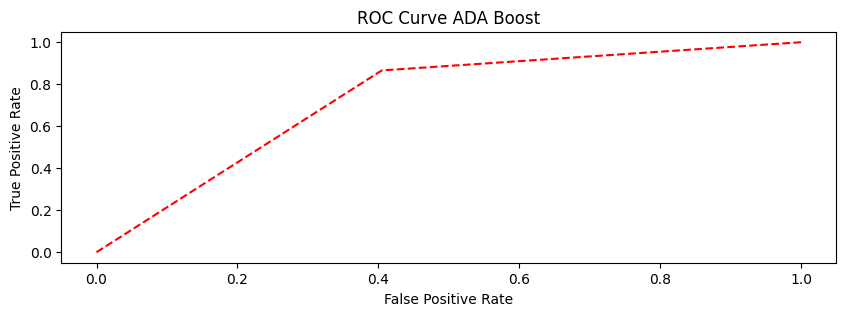

In [63]:
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,"r--")
plt.title("ROC Curve ADA Boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [70]:
from sklearn.metrics import confusion_matrix

rnd_clf_mat = confusion_matrix(y_test,y_predr)
ada_clf_mat = confusion_matrix(y_test,y_preda)

In [72]:
rnd_clf_mat

array([[17879, 10087],
       [10370, 52458]], dtype=int64)

In [71]:
ada_clf_mat

array([[16642, 11324],
       [ 8432, 54396]], dtype=int64)